In [1]:
import pandas as pd
import numpy as np
import random
df = pd.read_csv('combined_training.csv',names=['_','coords','number'])
removelist = pd.read_csv('remove_list_for_human_adv_images.txt',header=None,names=["remove"])
df = df.drop(removelist['remove'])
df

_                                             coords  number
0    0  [[408,242],[240,169],[419,53],[425,52],[432,25...       9
1    0  [[472.4259948730469,97.22699737548828],[241.28...       8
2    0  [[359.58099365234375,380.3869934082031],[381.3...       1
3    0  [[128.01600646972656,67.77799987792969],[314.7...       3
4    0  [[534.0419921875,201.8800048828125],[582.83697...       5
5    0  [[535.35302734375,263.8399963378906],[649.7760...       7
6    0  [[514.8660278320312,92.98799896240234],[481.96...       9
7    0  [[412.593994140625,371.1780090332031],[460.618...       0
9    0  [[180,184],[245,368],[413,269],[413,268],[336,...       0
10   0  [[111,333],[256,174],[108,154],[110,331],[216,...       2
11   0  [[488,218],[333,214],[348,58],[467,66],[486,21...       4
12   0  [[506.072998046875,71.70600128173828],[376.799...       4
13   0  [[301.2409973144531,303.7980041503906],[533.73...       6
16   0  [[308.8399963378906,66.3949966430664],[528.504...       3
17   0  [[573.56201171875,91.73999786376953],[323.0570...       5
18   0  [[227.2689971923828,79.24500274658203],[523.81...       7
19   0  [[517.4619750976562,247.58900451660156],[295.1...       9
20   0  [[259.6940002441406,366.4129943847656],[274.28...       0
21   0  [[257.614013671875,146.14599609375],[395.43499...       2
22   0  [[582.0919799804688,266.3760070800781],[257.90...       4
23   0  [[495.6940002441406,439.7650146484375],[298.92...       6
24   0  [[478.5740051269531,360.6929931640625],[264.29...       8
25   0  [[365.47900390625,156.51400756835938],[493.134...       1
26   0  [[389.7760009765625,66.79199981689453],[574.87...       3
28   0  [[245.03500366210938,83.09500122070312],[500.1...       7
29   0  [[420.2650146484375,89.74400329589844],[353.02...       9
30   0  [[418.9840087890625,70.53900146484375],[274.28...       0
31   0  [[215.72000122070312,184.44400024414062],[326....       2
32   0  [[363.0799865722656,87.99800109863281],[274.28...       4
33   0  [[422.9930114746094,38.018001556396484],[239.0...       6
..  ..                                                ...     ...
637  0  [[238,137],[476,38],[434,294],[434,282],[370,4...       2
638  0  [[151,15],[178,262],[499,268],[328,416],[345,2...       4
639  0  [[486,479],[430,313],[653,121],[498,467],[646,...       6
640  0  [[627,95],[356,414],[567,446],[562,434],[353,1...       8
641  0  [[272,190],[376,129],[376,217],[383,287],[374,...       1
642  0  [[306,266],[426,151],[272,69],[316,284],[489,3...       3
643  0  [[286,271],[274.2857142857143,133.829411119222...       5
644  0  [[137.14285714285714,436.2618391402066],[274.2...       7
645  0  [[169,391],[357,211],[261,79],[253,78],[139,20...       9
646  0  [[137.14285714285714,184.27137015387416],[254,...       0
649  0  [[336,440],[288,248],[388,129],[320,448],[442,...       6
654  0  [[466,181],[462,179],[261,176],[459,188],[409,...       7
655  0  [[588,265],[359,128],[587,107],[337,419],[534,...       9
656  0  [[393,433],[368,175],[551,123],[382,425],[554,...       0
657  0  [[363,198],[491,91],[592,184],[670,419],[330,4...       2
658  0  [[137.14285714285714,133.50479155778885],[164,...       4
659  0  [[490,435],[262,241],[411.42857142857144,110.3...       6
660  0  [[404,390],[205,114],[445,138],[455,150],[238,...       8
661  0  [[144,189],[280,109],[325,367],[171,402],[306,...       1
662  0  [[137.14285714285714,235.38743117824197],[344,...       3
663  0  [[328,377],[665,428],[540,261],[531,257],[685....       5
664  0  [[208,116],[389,107],[337,428],[231,269],[359,...       7
665  0  [[285,374],[361,295],[411.42857142857144,168.5...       9
666  0  [[360,390],[216,278],[353,118],[357,119],[483,...       0
667  0  [[183,128],[347,134],[248,306],[241,303],[147,...       2
668  0  [[400,336],[165,277],[345,110],[304,226],[314,...       4
669  0  [[349,415],[325,101],[482,58],[329,259],[514,3...       6
670  0  [[384,145],[622,452],[378,458],[383,145],[639,...       8
671  0  [[355,432],[339,44],[222,141],[189,38

In [2]:
df.shape

(553, 3)

In [3]:
coords = []
for coordstring in df['coords']:
    pairs = []
    spl = coordstring.split('],[')
    for s in spl:
        s = s.strip('[]').split(',')
        pairs.append([float(s[0]),float(s[1])])
    pairs = np.array(pairs)
    coords.append(pairs)
coords
#得到df中coords那一列的值，以array,6*2的方式

[array([[408., 242.],
        [240., 169.],
        [419.,  53.],
        [425.,  52.],
        [432., 256.],
        [445., 423.]]), array([[472.42599487,  97.22699738],
        [241.28799438,  75.77500153],
        [427.93499756, 358.94100952],
        [436.85198975, 362.42599487],
        [251.7789917 , 359.93099976],
        [472.6789856 ,  98.90799713]]), array([[359.58099365, 380.38699341],
        [381.36700439, 206.50100708],
        [379.25601196,  76.5759964 ],
        [384.46899414,  76.14700317],
        [326.60198975, 117.27300262],
        [301.51300049, 132.80200195]]), array([[128.01600647,  67.77799988],
        [314.74798584, 124.17300415],
        [240.94299316, 183.375     ],
        [240.00999451, 182.69000244],
        [306.10998535, 283.47198486],
        [166.2749939 , 339.97299194]]), array([[534.04199219, 201.88000488],
        [582.8369751 , 102.86199951],
        [874.20098877, 150.21499634],
        [548.57142857, 194.20521168],
        [766.01000977, 365.4

In [4]:
from scipy import interpolate
def plotcurve(data):
    tck,u = interpolate.splprep(data.transpose(), s=0, k=2)
    unew = np.arange(0, 1.01, 0.01)
    out = interpolate.splev(unew, tck)
    plt.plot(out[0], out[1], color='orange',lw=3)
    plt.plot(data[:,0], data[:,1], 'ob',lw=3)

(-1179.3121224176316,
 17047.22123743693,
 -1057.4218031762707,
 16674.41226682782)

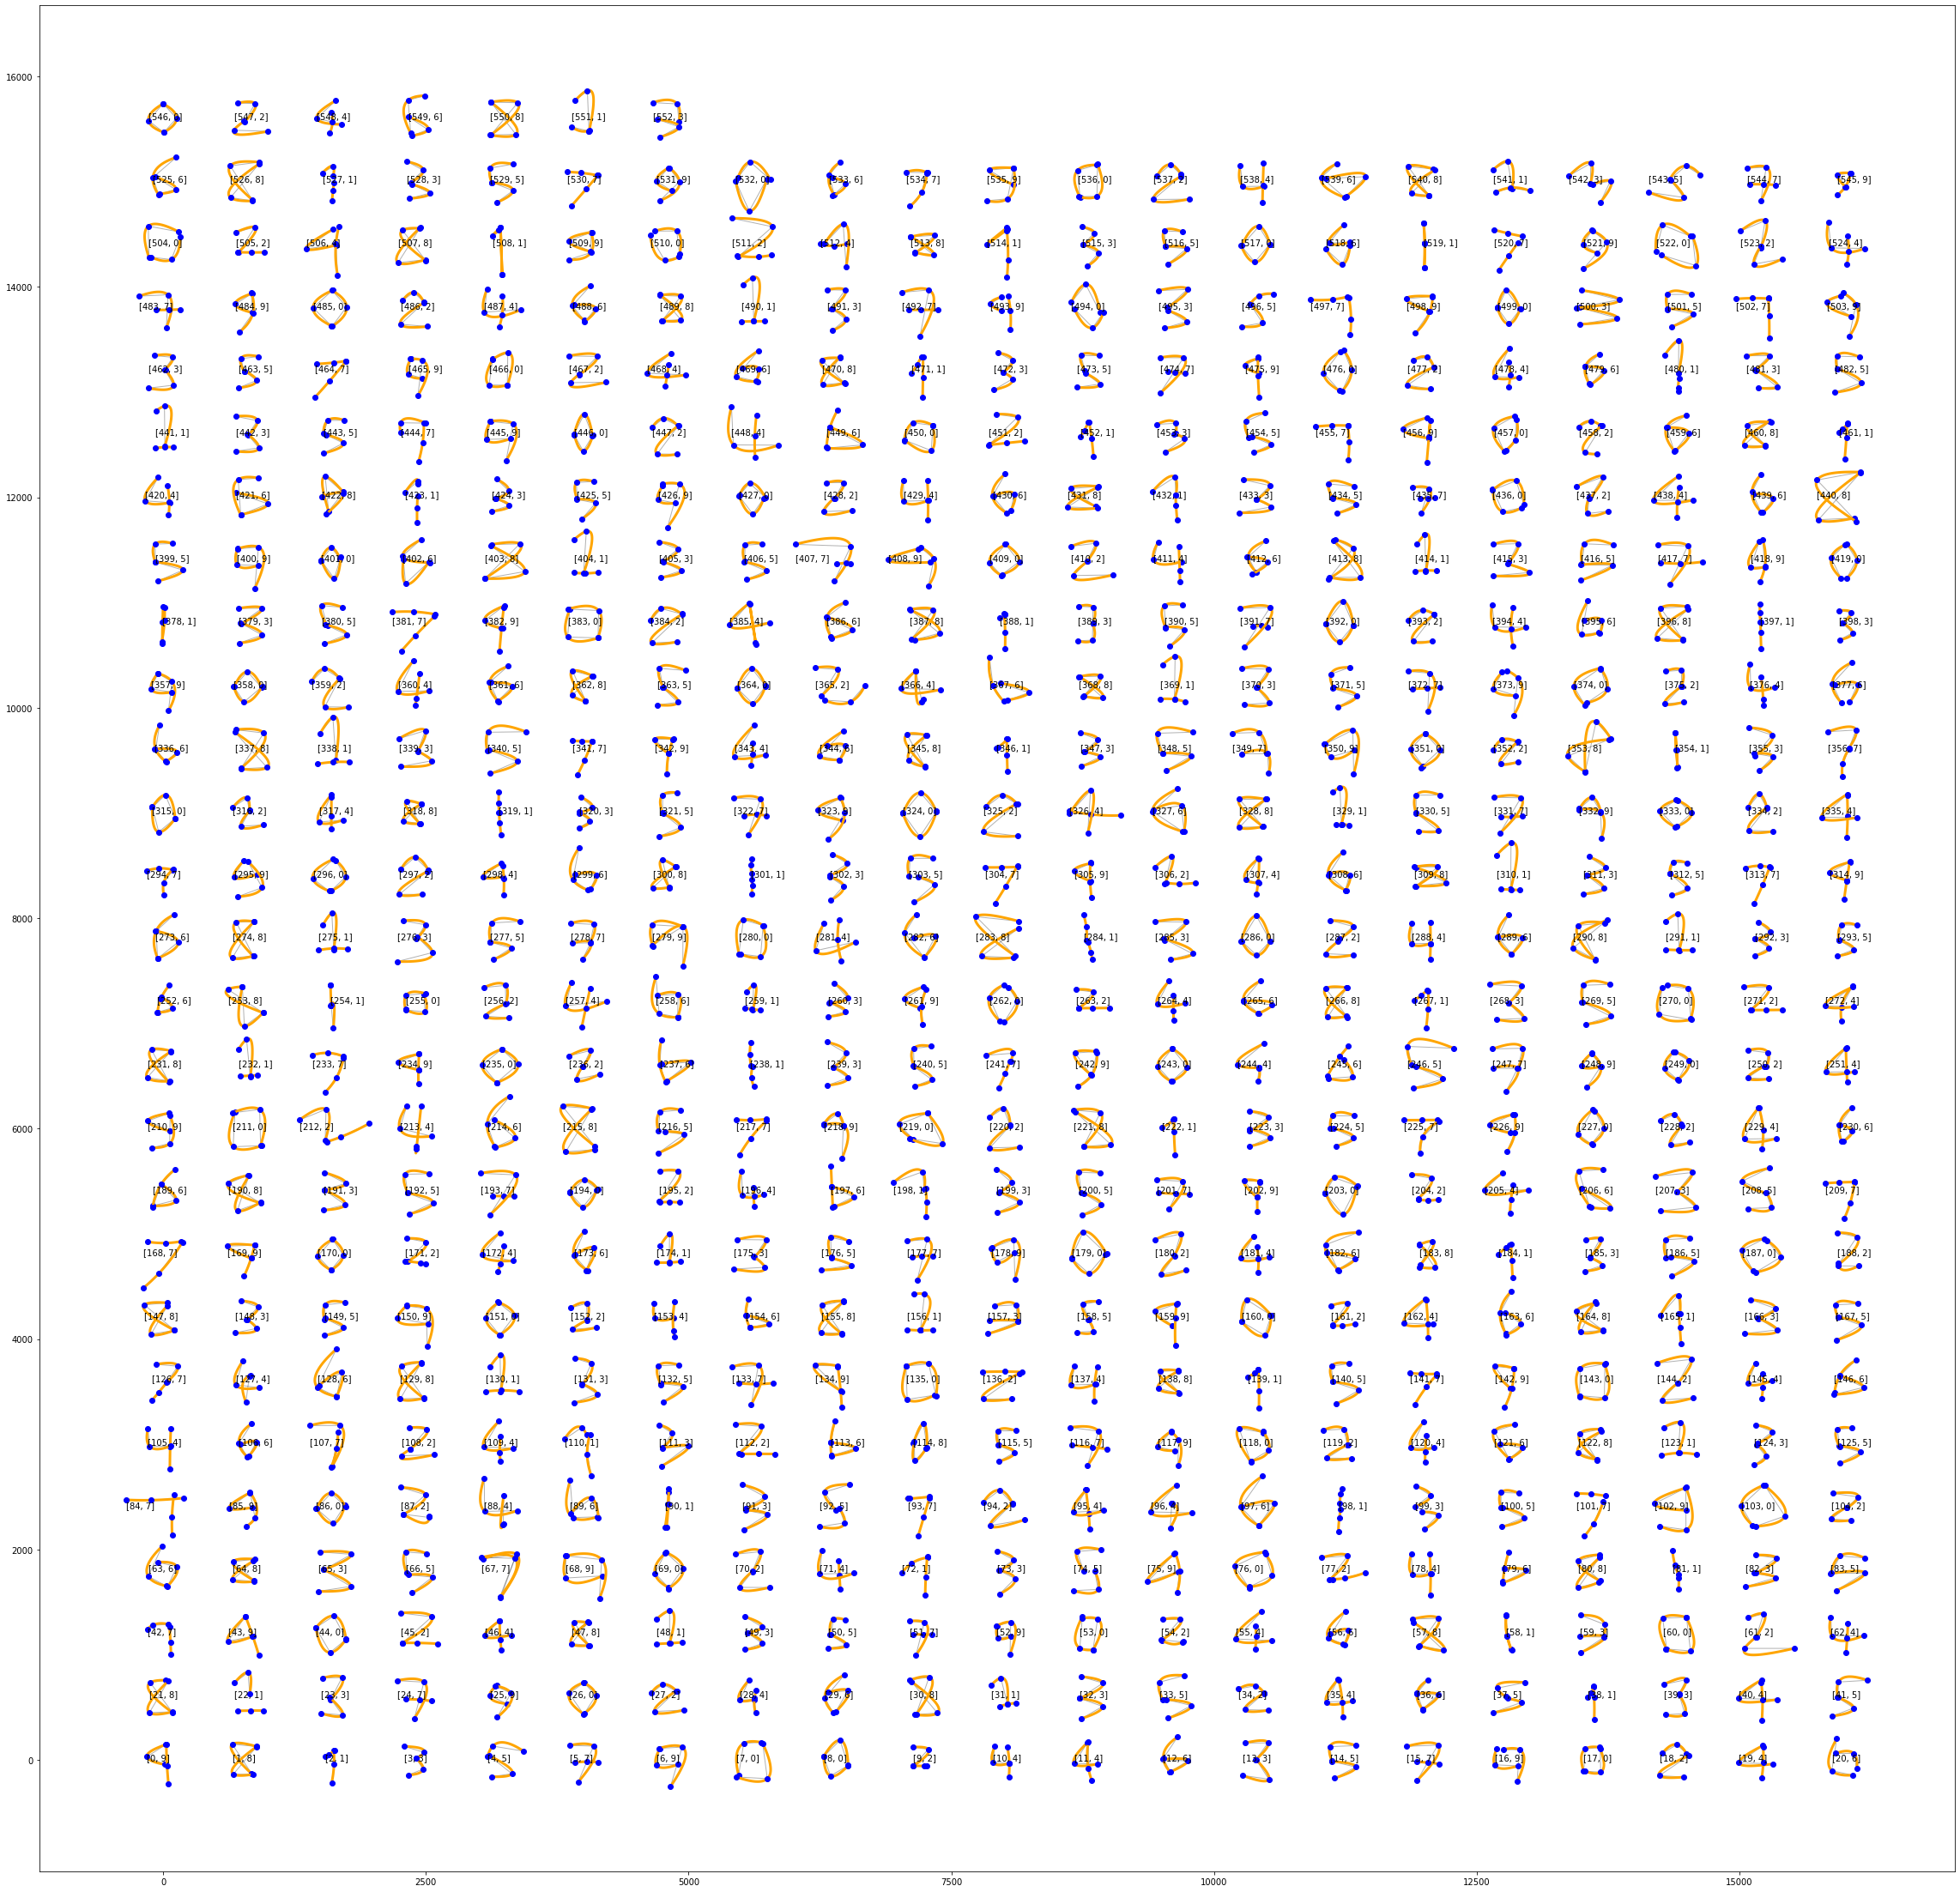

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
x = 0
y = 0
plt.figure(figsize=[40,40])
for i,(num,pairs_temp) in enumerate(zip(df['number'],coords)):
    pairs = pairs_temp.copy()
    pairs[:,0]=(pairs[:,0]-np.mean(pairs[:,0]))+x
    pairs[:,1]=-(pairs[:,1]-np.mean(pairs[:,1]))+y
    plt.plot(pairs[:3,0],pairs[:3,1],'k-',lw=1,alpha=0.3)
    plt.plot(pairs[3:,0],pairs[3:,1],'k-',lw=1,alpha=0.3)
    plotcurve(pairs[:3,:])
    plotcurve(pairs[3:,:])
    plt.text(np.min(pairs[:,0]),np.mean(pairs[:,1]),[i,num],fontsize=10)
    x+=800
    if x>16000:
        x=0
        y+=600
    #if y>2000:
    #    break
plt.axis('equal')

In [6]:
#分类训练集和测试集
np.random.seed(27193)
indexes_total=df.shape[0]
random_indexes = np.random.permutation(indexes_total)
training_total=int(indexes_total*0.7)
training_part=random_indexes[0:training_total]
training_dataframe=pd.DataFrame(df.iloc[training_part])
print(training_dataframe)
test_total=indexes_total-training_total
test_part=random_indexes[training_total:indexes_total]
test_dataframe=pd.DataFrame(df.iloc[test_part])
print(test_dataframe)

     _                                             coords  number
197  0  [[443,458],[388,259],[497,54],[434,257],[586,3...       6
74   0  [[363,259],[357,59],[555,73],[385,275],[609,29...       5
386  0  [[367,79],[248,340],[475,323],[366,100],[365,2...       4
564  0  [[293,89],[516,90],[291,428],[368,223],[436,23...       7
375  0  [[68,205],[225,104],[162,362],[456,353],[301,3...       2
126  0  [[137.14285714285714,98.99000469595194],[425,9...       7
36   0  [[440.3800048828125,78.18399810791016],[647.23...       3
210  0  [[137.14285714285714,87.7223719842732],[412,90...       3
9    0  [[180,184],[245,368],[413,269],[413,268],[336,...       0
441  0  [[556,421],[751,396],[603,253],[610,252],[574,...       5
357  0  [[340,73],[240,284],[369,443],[368,446],[473,2...       6
594  0  [[62,149],[274.2857142857143,145.9049558266997...       7
31   0  [[215.72000122070312,184.44400024414062],[326....       2
672  0  [[163,122],[396,135],[411.42857142857144,301.4...       3
393  0  [[

In [7]:

training_coords = []
for coordstring in training_dataframe['coords']:
    pairs = []
    spl = coordstring.split('],[')
    for s in spl:
        s = s.strip('[]').split(',')
        pairs.append([float(s[0]),float(s[1])])
    pairs = np.array(pairs)
    training_coords.append(pairs)
training_shape=(np.array(training_coords)).shape

In [8]:

test_coords = []
for coordstring in test_dataframe['coords']:
    pairs = []
    spl = coordstring.split('],[')
    for s in spl:
        s = s.strip('[]').split(',')
        pairs.append([float(s[0]),float(s[1])])
    pairs = np.array(pairs)
    test_coords.append(pairs)
test_shape=(np.array(test_coords)).shape
test_shape

(166, 6, 2)

In [9]:
dim=(np.array(coords)).shape

In [10]:
#分类训练集和测试集
total_array = np.zeros(shape=(dim[0],12))
for i in range(dim[0]):
    total_array[i]=np.ravel(coords[i])

total_array

array([[408.        , 242.        , 240.        , ..., 256.        ,
        445.        , 423.        ],
       [472.42599487,  97.22699738, 241.28799438, ..., 359.93099976,
        472.6789856 ,  98.90799713],
       [359.58099365, 380.38699341, 381.36700439, ..., 117.27300262,
        301.51300049, 132.80200195],
       ...,
       [384.        , 145.        , 622.        , ..., 151.        ,
        385.        , 456.        ],
       [355.        , 432.        , 339.        , ..., 428.        ,
        360.        , 425.        ],
       [163.        , 122.        , 396.        , ..., 352.        ,
        208.        , 282.        ]])

In [11]:
#分类训练集和测试集
total_label=df[['number']].values
total_label=np.ravel(total_label)
total_label

array([9, 8, 1, 3, 5, 7, 9, 0, 0, 2, 4, 4, 6, 3, 5, 7, 9, 0, 2, 4, 6, 8,
       1, 3, 7, 9, 0, 2, 4, 6, 8, 1, 3, 5, 2, 4, 6, 5, 1, 3, 4, 5, 7, 9,
       0, 2, 4, 8, 1, 3, 5, 7, 9, 0, 2, 4, 6, 8, 1, 3, 0, 2, 4, 6, 8, 3,
       5, 7, 9, 0, 2, 4, 1, 3, 5, 9, 0, 2, 4, 6, 8, 1, 3, 5, 7, 9, 0, 2,
       4, 6, 1, 3, 5, 7, 2, 4, 4, 6, 1, 3, 5, 7, 9, 0, 2, 4, 6, 7, 2, 4,
       1, 3, 2, 6, 8, 5, 7, 9, 0, 2, 4, 6, 8, 1, 3, 5, 7, 4, 6, 8, 1, 3,
       5, 7, 9, 0, 2, 4, 8, 1, 5, 7, 9, 0, 2, 4, 6, 8, 3, 5, 9, 0, 2, 4,
       6, 8, 1, 3, 5, 9, 0, 2, 4, 6, 8, 1, 3, 5, 7, 9, 0, 2, 4, 6, 1, 3,
       5, 7, 9, 0, 2, 4, 6, 8, 1, 3, 5, 0, 2, 6, 8, 3, 5, 7, 0, 2, 4, 6,
       1, 3, 5, 7, 9, 0, 2, 4, 6, 3, 5, 7, 9, 0, 2, 4, 6, 8, 5, 7, 9, 0,
       2, 8, 1, 3, 5, 7, 9, 0, 2, 4, 6, 8, 1, 7, 9, 0, 2, 6, 1, 3, 5, 7,
       9, 0, 4, 6, 5, 7, 9, 0, 2, 4, 6, 8, 1, 0, 2, 4, 6, 1, 3, 9, 0, 2,
       4, 6, 8, 1, 3, 5, 0, 2, 4, 6, 8, 1, 3, 5, 7, 9, 0, 4, 6, 8, 1, 3,
       0, 2, 4, 6, 8, 1, 3, 5, 7, 9, 0, 2, 4, 6, 8,

In [12]:
training_array = np.zeros(shape=(training_shape[0],12))
for i in range(training_shape[0]):
    training_array[i]=np.ravel(training_coords[i])

In [13]:
train_label=training_dataframe[['number']].values
training_label=np.ravel(train_label)
training_label

array([6, 5, 4, 7, 2, 7, 3, 3, 0, 5, 6, 7, 2, 3, 9, 6, 1, 4, 9, 9, 6, 7,
       8, 3, 8, 1, 5, 8, 5, 2, 7, 4, 1, 1, 8, 6, 6, 0, 2, 8, 4, 5, 6, 9,
       0, 7, 8, 4, 3, 2, 6, 4, 0, 2, 7, 6, 9, 0, 7, 3, 1, 2, 6, 3, 4, 9,
       3, 8, 3, 0, 1, 8, 2, 6, 3, 7, 9, 8, 2, 4, 4, 7, 8, 1, 6, 9, 2, 8,
       2, 0, 2, 4, 6, 1, 8, 0, 7, 2, 1, 6, 8, 2, 7, 4, 4, 7, 9, 7, 0, 0,
       2, 1, 4, 0, 4, 0, 6, 1, 9, 7, 8, 3, 2, 6, 1, 4, 5, 3, 2, 6, 5, 6,
       3, 9, 7, 0, 2, 5, 7, 1, 0, 0, 7, 3, 6, 3, 4, 5, 0, 7, 1, 9, 3, 8,
       0, 5, 4, 2, 2, 3, 1, 4, 1, 5, 4, 1, 1, 1, 4, 3, 4, 5, 2, 2, 7, 2,
       5, 9, 1, 3, 9, 6, 8, 3, 2, 8, 3, 1, 2, 4, 0, 0, 2, 1, 2, 9, 4, 2,
       2, 4, 4, 1, 6, 2, 2, 7, 3, 1, 0, 7, 8, 2, 7, 3, 0, 3, 1, 4, 9, 2,
       3, 0, 4, 5, 3, 5, 6, 9, 7, 2, 5, 0, 1, 7, 7, 8, 9, 8, 1, 2, 8, 2,
       9, 9, 9, 0, 1, 5, 3, 1, 9, 4, 1, 5, 5, 9, 0, 3, 0, 8, 7, 6, 9, 5,
       6, 9, 7, 9, 8, 4, 6, 7, 3, 7, 8, 8, 1, 4, 0, 1, 1, 0, 5, 2, 6, 0,
       7, 1, 3, 5, 8, 5, 8, 1, 3, 2, 7, 7, 8, 0, 6,

In [14]:
test_array = np.zeros(shape=(test_shape[0],12))
for i in range(test_shape[0]):
    test_array[i]=np.ravel(test_coords[i])

In [15]:
ts_label=test_dataframe[['number']].values
test_label=np.ravel(ts_label)
test_label

array([0, 3, 5, 2, 7, 8, 3, 6, 9, 9, 0, 2, 0, 5, 1, 0, 5, 4, 5, 2, 3, 8,
       4, 3, 7, 0, 0, 1, 6, 6, 7, 9, 3, 5, 6, 0, 0, 0, 8, 2, 9, 7, 0, 4,
       4, 9, 7, 5, 7, 1, 8, 1, 9, 1, 5, 3, 9, 5, 8, 3, 2, 8, 5, 1, 6, 2,
       9, 4, 5, 0, 1, 5, 3, 1, 0, 4, 9, 6, 3, 6, 6, 6, 0, 0, 3, 5, 6, 6,
       8, 4, 0, 7, 4, 5, 5, 9, 3, 3, 6, 0, 6, 7, 4, 1, 5, 0, 5, 4, 1, 6,
       6, 8, 6, 5, 8, 4, 8, 9, 1, 2, 5, 9, 7, 3, 2, 7, 6, 0, 9, 2, 9, 1,
       9, 6, 2, 9, 4, 2, 3, 4, 9, 9, 8, 0, 4, 7, 3, 9, 2, 1, 6, 5, 5, 5,
       2, 5, 3, 2, 5, 0, 4, 4, 2, 7, 8, 4], dtype=int64)

In [16]:
#使用逻辑回归
from sklearn.linear_model import LogisticRegression
train=training_array
test=test_array 
train_model = LogisticRegression(multi_class='ovr',solver='liblinear') 
train_model.fit(train,training_label)  
predict_label=train_model.predict(test)
score_37=train_model.score(test,test_label)
predict_label

array([0, 3, 6, 2, 7, 8, 3, 6, 9, 8, 0, 7, 0, 6, 2, 0, 2, 4, 7, 0, 6, 4,
       4, 3, 2, 0, 0, 1, 6, 9, 7, 9, 3, 5, 6, 0, 0, 0, 8, 2, 6, 3, 0, 4,
       4, 9, 7, 5, 7, 1, 8, 8, 9, 1, 7, 3, 9, 0, 8, 3, 2, 8, 8, 1, 4, 2,
       7, 4, 6, 6, 8, 5, 3, 7, 1, 4, 8, 6, 3, 0, 6, 4, 0, 0, 0, 6, 6, 6,
       3, 7, 0, 1, 9, 6, 7, 9, 3, 0, 4, 0, 4, 5, 2, 8, 6, 0, 6, 4, 8, 6,
       6, 8, 6, 1, 8, 4, 4, 5, 2, 2, 5, 9, 5, 3, 2, 7, 6, 0, 9, 2, 9, 1,
       2, 6, 2, 9, 4, 2, 3, 4, 8, 8, 6, 0, 4, 7, 3, 5, 2, 1, 6, 6, 1, 8,
       2, 5, 3, 2, 6, 0, 4, 4, 2, 7, 4, 4], dtype=int64)

In [17]:
#获得逻辑回归的参数
para=train_model.coef_
intercept=train_model.intercept_

In [18]:
intercept

array([-3.86981091e-05, -8.85361103e-01, -1.13716593e+00, -2.39711118e-01,
       -2.31779643e-01, -3.60209738e-01, -2.16429986e+00,  3.94401242e-05,
       -1.38693655e+00,  4.27956374e-01])

In [19]:
para

array([[-0.00835739,  0.00476739, -0.01098759,  0.00333779,  0.00544181,
         0.00318605, -0.00315016, -0.00964647,  0.00999896,  0.00233461,
         0.00337535, -0.0113357 ],
       [ 0.00369869,  0.00429925,  0.00370445, -0.01464834,  0.0017257 ,
         0.00524575, -0.00110285,  0.00213359, -0.00621118, -0.00997751,
        -0.00158093,  0.00514957],
       [-0.00690712, -0.00235808,  0.00380544,  0.00028891, -0.01068408,
        -0.00417193,  0.00705951, -0.00038948, -0.00824659,  0.00461474,
         0.01112905, -0.00071656],
       [-0.00669179, -0.01018725,  0.01679765,  0.00144465, -0.0066547 ,
        -0.01431628, -0.00425569,  0.01106535,  0.00906565, -0.00512373,
        -0.01350425,  0.00440088],
       [ 0.0060593 , -0.01885631, -0.00481405,  0.02273442, -0.00014254,
        -0.01416462,  0.00210909, -0.00511169, -0.00713606,  0.00857981,
         0.00089198, -0.0024042 ],
       [ 0.00725633,  0.00217409,  0.00266082, -0.00788693, -0.00124853,
         0.00133298, -

In [20]:
#评测逻辑回归模型
from sklearn.metrics import confusion_matrix
C=confusion_matrix(test_label, predict_label)
C

array([[18,  1,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 0,  6,  2,  0,  0,  0,  0,  1,  4,  0],
       [ 1,  0, 13,  0,  0,  0,  0,  1,  0,  0],
       [ 2,  0,  0, 13,  0,  0,  1,  0,  0,  0],
       [ 0,  0,  1,  0, 14,  0,  0,  1,  0,  1],
       [ 1,  2,  1,  0,  0,  5,  9,  3,  2,  0],
       [ 1,  0,  0,  0,  4,  0, 13,  0,  0,  1],
       [ 0,  1,  1,  1,  0,  2,  0,  7,  0,  0],
       [ 0,  0,  0,  1,  3,  0,  1,  0,  7,  0],
       [ 0,  0,  1,  0,  0,  2,  1,  1,  4, 10]], dtype=int64)

In [21]:
#评测逻辑回归模型
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
clf = LogisticRegression(multi_class='ovr',solver='liblinear')
scores = cross_val_score(clf, total_array,total_label, cv=5)

scores                             


array([0.6       , 0.6875    , 0.67567568, 0.63888889, 0.57009346])

In [22]:
a=[0.6       , 0.6875    , 0.67567568, 0.63888889, 0.57009346]
sum(a)/5

0.634431606

In [23]:
#计算逻辑回归参数的梯度
def gradient_F_X(x):#x is an array
    gradient_f_x=np.zeros((10,12))
    linear_para=np.dot(para,x)
    exp_linear_para=np.exp(linear_para)
    Denominator=sum(exp_linear_para)
    for j in range(10):
        for i in range(12):
            front=para[j][i]*exp_linear_para[j]*Denominator
            later=sum(exp_linear_para[j]*(exp_linear_para*para[:,i]))
            gradient_f_x[j][i]=(front-later)/(Denominator*Denominator)
    return gradient_f_x

In [24]:
gradient_F_X(train[0])

array([[-2.01073010e-04,  3.25609671e-05, -1.38174456e-04,
        -6.40204410e-05,  8.37629459e-05,  7.73267710e-05,
         7.59476119e-05, -2.02021047e-04,  7.97036948e-05,
         3.30342664e-05,  1.68073385e-04, -1.55636045e-04],
       [-5.98726932e-06,  2.37633239e-05,  9.42878107e-05,
        -3.37087840e-04,  2.25548978e-05,  1.05140607e-04,
         1.03639232e-04, -1.11276607e-05, -1.73185742e-04,
        -1.57685248e-04,  8.36553097e-05,  1.05228749e-04],
       [-8.81686272e-05, -4.09747402e-05,  5.00383014e-05,
        -5.62224316e-05, -8.77316261e-05, -2.06207029e-05,
         1.19560829e-04, -2.60410770e-05, -1.06742785e-04,
         3.46789030e-05,  1.45592040e-04,  7.90336412e-06],
       [-4.96499663e-05, -5.95928744e-05,  8.85776689e-05,
        -2.69697574e-05, -3.18329557e-05, -5.85648711e-05,
         1.65591999e-05,  3.77991572e-05,  1.84231350e-05,
        -2.49329221e-05, -2.98270984e-05,  2.81084327e-05],
       [ 4.54839635e-06, -4.98706261e-05, -5.4908787

In [25]:
#计算saliency的值
def saliency_po(gradient_f_x):
    S=np.zeros((10,12))
    for i in range(10):
        s=0
        for j in range(12):
            for n in range(10):
                s=s+gradient_f_x[n][j]
            s=s-gradient_f_x[i][j]
            if gradient_f_x[i][j]<0 or s>0:
                S[i][j]=0
            else:
                S[i][j]=np.abs(s)*gradient_f_x[i][j]
    return S

In [26]:
def saliency_ne(gradient_f_x):
    S=np.zeros((10,12))
    for i in range(10):
        s=0
        for j in range(12):
            for n in range(10):
                s=s+gradient_f_x[n][j]
            s=s-gradient_f_x[i][j]
            if gradient_f_x[i][j]>0 or s<0:
                S[i][j]=0
            else:
                S[i][j]=np.abs(s)*gradient_f_x[i][j]
    return S

In [27]:
#计算参数固定之后模型的分类结果
def logstic(x):
    ss=0

    for i in range(10):
        ss=ss+np.exp(np.dot(para[i],x)+intercept[i])

    sss=np.zeros(10)
    for i in range(10):
        sss[i]=np.exp(np.dot(para[i],x)+intercept[i])/ss
    return sss

In [28]:
logstic(train[0])

array([0.09872165, 0.03871923, 0.01571558, 0.02214545, 0.01118581,
       0.09817538, 0.62159164, 0.00707532, 0.06255183, 0.0241181 ])

In [29]:
#计算jsma的边界值，使得样本变成另一个类
def boundary(sample,target_class,gamma):
    xx=sample.copy()
    while (np.argmax(logstic(xx)))!=target_class and np.sqrt(sum(np.power(sample-xx,2)))<gamma:
        gradient_f_x=gradient_F_X(xx)
        aa=saliency_po(gradient_f_x)
        bb=saliency_ne(gradient_f_x)
        if np.max(aa[target_class])==0 and np.min(bb[target_class])==0:
            print('this sample cannot be changed to this class')
            break
        elif np.max(aa[target_class])>=abs(np.min(bb[target_class])):
            loc=np.where(aa[target_class]==np.max(aa[target_class]))
            inter_1=np.zeros(np.shape(xx))
            inter_1[loc[0]]=inter_1[loc[0]]+1
            xx=xx+inter_1
            inter_1[loc[0]]=0
        else:
            loc=np.where(bb[target_class]==np.min(bb[target_class]))
            inter_1=np.zeros(np.shape(xx))
            inter_1[loc[0]]=inter_1[loc[0]]+1
            xx=xx-inter_1
            inter_1[loc[0]]=0
#target_class=np.argmax(logstic(xx))
    if np.argmax(logstic(xx))==target_class:
        return xx
#         print(logstic(xx))
    else:
        return xx
        print('this training point can’t be misclassified as the target class')
    

In [30]:
#使用SVC模型
from sklearn import svm
from sklearn.svm import LinearSVC

clf =LinearSVC(penalty='l2', loss='squared_hinge', dual=False, tol=1e-8, C=1.0, multi_class='ovr', 
               fit_intercept=True, intercept_scaling=1, class_weight=None, verbose=0)
clf.fit(train,train_label)
para_svm=clf.coef_
interception_svm=clf.intercept_
score= clf.score(test,test_label)
print("The score of poly is : %f"%score)

print(clf.coef_)
print(clf.intercept_)

The score of poly is : 0.644578
[[-2.34936545e-03  1.53612395e-03 -2.93941347e-03  1.01327211e-03
   1.39360354e-03  1.12998828e-03 -7.81974680e-04 -2.51581776e-03
   2.72518673e-03  8.53553495e-04  1.09955876e-03 -3.03668223e-03]
 [ 7.72132741e-04  1.11297238e-03  5.95595841e-04 -2.87502124e-03
   5.38808442e-04  1.43833073e-03 -2.40885749e-04  6.43808600e-04
  -1.24378197e-03 -1.96216185e-03 -2.81869321e-04  1.32811248e-03]
 [-1.81247365e-03 -3.19838161e-04  8.01644834e-04  6.11425013e-04
  -2.57737641e-03 -6.06628385e-04  1.80894483e-03 -5.54211180e-05
  -1.60354171e-03  1.54130076e-03  2.80921079e-03  6.92712994e-06]
 [-1.83071191e-03 -2.30298664e-03  5.12101634e-03  8.92633832e-04
  -1.47197784e-03 -3.17600113e-03 -7.78801600e-04  3.23104938e-03
   2.30598865e-03 -4.53531360e-04 -4.15899272e-03  1.74245409e-03]
 [ 1.62234115e-03 -5.11128499e-03 -1.10468207e-03  6.63955693e-03
   2.85485399e-04 -3.83227504e-03  5.57370934e-04 -1.05040856e-03
  -2.16247200e-03  2.64491259e-03  3.671

D:\Python\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [31]:
#计算svc参数的梯度
def gradient_F_X_svm(x):#x is an array
    gradient_f_x_log=np.zeros((10,12))
    linear_para=np.dot(para_svm,x)
    exp_linear_para=np.exp(linear_para)
    Denominator=sum(exp_linear_para)
    for j in range(10):
        for i in range(12):
            front=para[j][i]*exp_linear_para[j]*Denominator
            later=sum(exp_linear_para[j]*(exp_linear_para*para[:,i]))
            gradient_f_x_log[j][i]=(front-later)/(Denominator*Denominator)
    return gradient_f_x_log
#这个不对，我不知道怎么求svm的梯度

In [32]:
def prediction_svm(x):
    prediction_svm=np.dot(para_svm,x)+interception_svm
    return prediction_svm

In [33]:
prediction_svm(train[1])
    

array([-0.96635878, -0.60065569, -1.55433239, -0.7650282 , -2.09245667,
       -0.66082361, -0.94795468, -0.34009705, -1.41184107, -0.71269092])

In [34]:
h=np.eye(12)
h=h*0.000001
h[0]

array([1.e-06, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00,
       0.e+00, 0.e+00, 0.e+00, 0.e+00])

In [35]:
def gradient_F_X_svm(x):
    gradient_f_x_svm=np.zeros((12,10))
    h=np.eye(12)
    gap=0.000001
    h=h*gap
    for i in range(12):
        gradient_f_x_svm[i]=(prediction_svm(x+h[i])-prediction_svm(x))/gap
    gradient_f_x_svm=gradient_f_x_svm.T
    return gradient_f_x_svm

In [36]:
gradient_F_X_svm(train[0])

array([[-2.34936559e-03,  1.53612389e-03, -2.93941360e-03,
         1.01327213e-03,  1.39360345e-03,  1.12998833e-03,
        -7.81974707e-04, -2.51581778e-03,  2.72518674e-03,
         8.53553450e-04,  1.09955867e-03, -3.03668224e-03],
       [ 7.72132580e-04,  1.11297238e-03,  5.95596017e-04,
        -2.87502111e-03,  5.38808553e-04,  1.43833079e-03,
        -2.40885534e-04,  6.43808562e-04, -1.24378197e-03,
        -1.96216177e-03, -2.81869195e-04,  1.32811251e-03],
       [-1.81247373e-03, -3.19838156e-04,  8.01644973e-04,
         6.11425133e-04, -2.57737631e-03, -6.06628303e-04,
         1.80894499e-03, -5.54212232e-05, -1.60354152e-03,
         1.54130086e-03,  2.80921064e-03,  6.92712554e-06],
       [-1.83071180e-03, -2.30298647e-03,  5.12101650e-03,
         8.92633967e-04, -1.47197765e-03, -3.17600102e-03,
        -7.78801468e-04,  3.23104943e-03,  2.30598873e-03,
        -4.53531435e-04, -4.15899271e-03,  1.74245418e-03],
       [ 1.62234093e-03, -5.11128517e-03, -1.1046821

In [37]:
clf.predict([train[1]])

array([7], dtype=int64)

In [38]:
xx=train[0]
clf.predict([xx])

array([6], dtype=int64)

In [39]:
def boundary_svm(sample,target_class,gamma):
    xx=sample.copy()
    while (clf.predict([xx]))!=target_class and np.sqrt(sum(np.power(sample-xx,2)))<gamma:
        gradient_f_x=gradient_F_X_svm(xx)
        aa=saliency_po(gradient_f_x)
        bb=saliency_ne(gradient_f_x)
        if np.max(aa[target_class])==0 and np.min(bb[target_class])==0:
            print('this sample cannot be changed to this class')
            break
        elif np.max(aa[target_class])>=abs(np.min(bb[target_class])):
            loc=np.where(aa[target_class]==np.max(aa[target_class]))
            inter_1=np.zeros(np.shape(xx))
            inter_1[loc[0]]=inter_1[loc[0]]+1
            xx=xx+inter_1
            inter_1[loc[0]]=0
        else:
            loc=np.where(bb[target_class]==np.min(bb[target_class]))
            inter_1=np.zeros(np.shape(xx))
            inter_1[loc[0]]=inter_1[loc[0]]+1
            xx=xx-inter_1
            inter_1[loc[0]]=0
#target_class=np.argmax(logstic(xx))
    if clf.predict([xx])==target_class:
        return xx
#         print(logstic(xx))
    else:
        return xx
        print('this training point can’t be misclassified as the target class')
    

In [124]:
boundary(train[0],1,1000)

array([443., 458., 388., 121., 497.,  54., 434., 257., 586., 363., 443.,
       471.])

In [123]:
boundary_svm(train[0],1,1000)

array([ 443.,  458.,  388.,  259.,  497.,   54.,  434.,  257.,  586.,
        363.,  443., 1471.])

In [125]:
train[0]

array([443., 458., 388., 259., 497.,  54., 434., 257., 586., 363., 443.,
       471.])

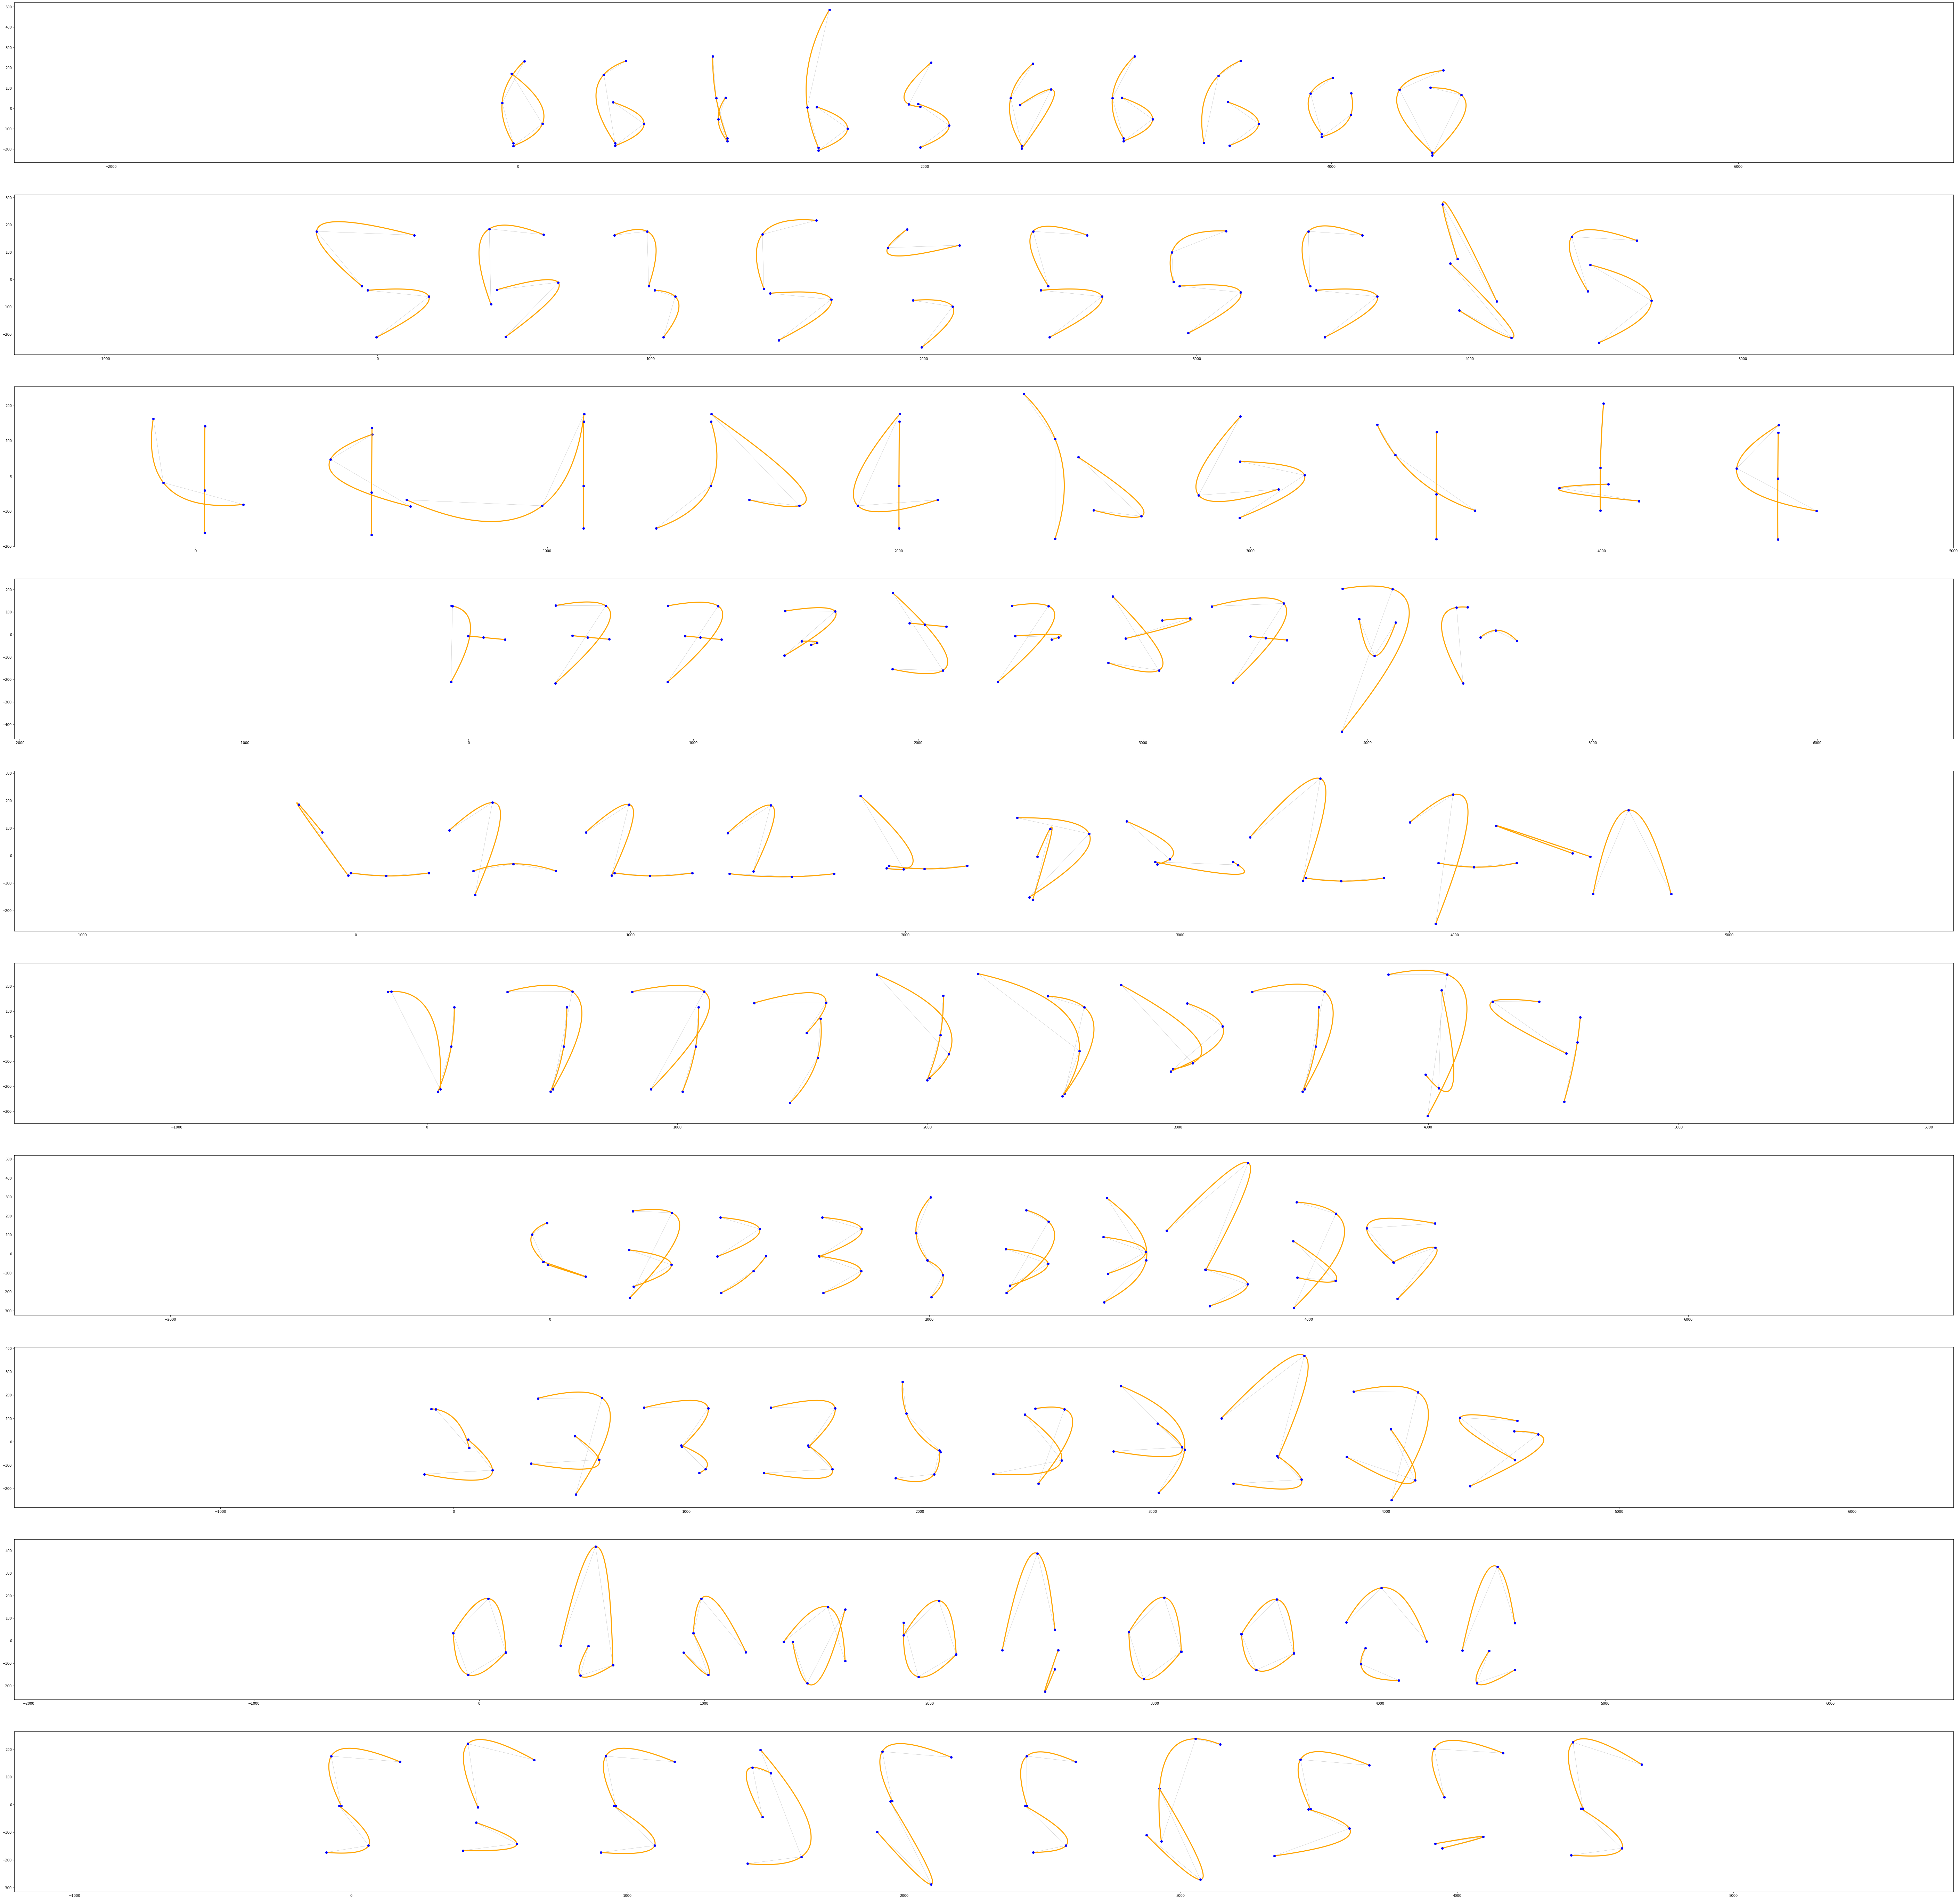

In [40]:
#画10个刚好被误认为其他类的样本的图
plt.figure(figsize=[100,100])
#fig,axes=plt.subplots(10,1)
for n in range(10):
    ax = plt.subplot(10,1,n+1)
    ax=plt.sca(ax)
    barray=np.zeros((10,12))
    x=0
    y=0
    #387 loops
    for i in range(10):
        barray[i]=boundary(train[n],i,1000)
    for j in range(10):
        pairs=barray[j].copy()
        pairs=np.reshape(pairs,(6,-1))

        pairs[:,0]=(pairs[:,0]-np.mean(pairs[:,0]))+x
        pairs[:,1]=-(pairs[:,1]-np.mean(pairs[:,1]))+y
        plt.plot(pairs[:3,0],pairs[:3,1],'k-',lw=0.5,alpha=0.3)
        plt.plot(pairs[3:,0],pairs[3:,1],'k-',lw=0.5,alpha=0.3)
        plotcurve(pairs[:3,:])
        plotcurve(pairs[3:,:])
        #plt.text(np.min(pairs[:,0]),np.mean(pairs[:,1]),[j],fontsize=10)
        x+=500
    plt.axis('equal')

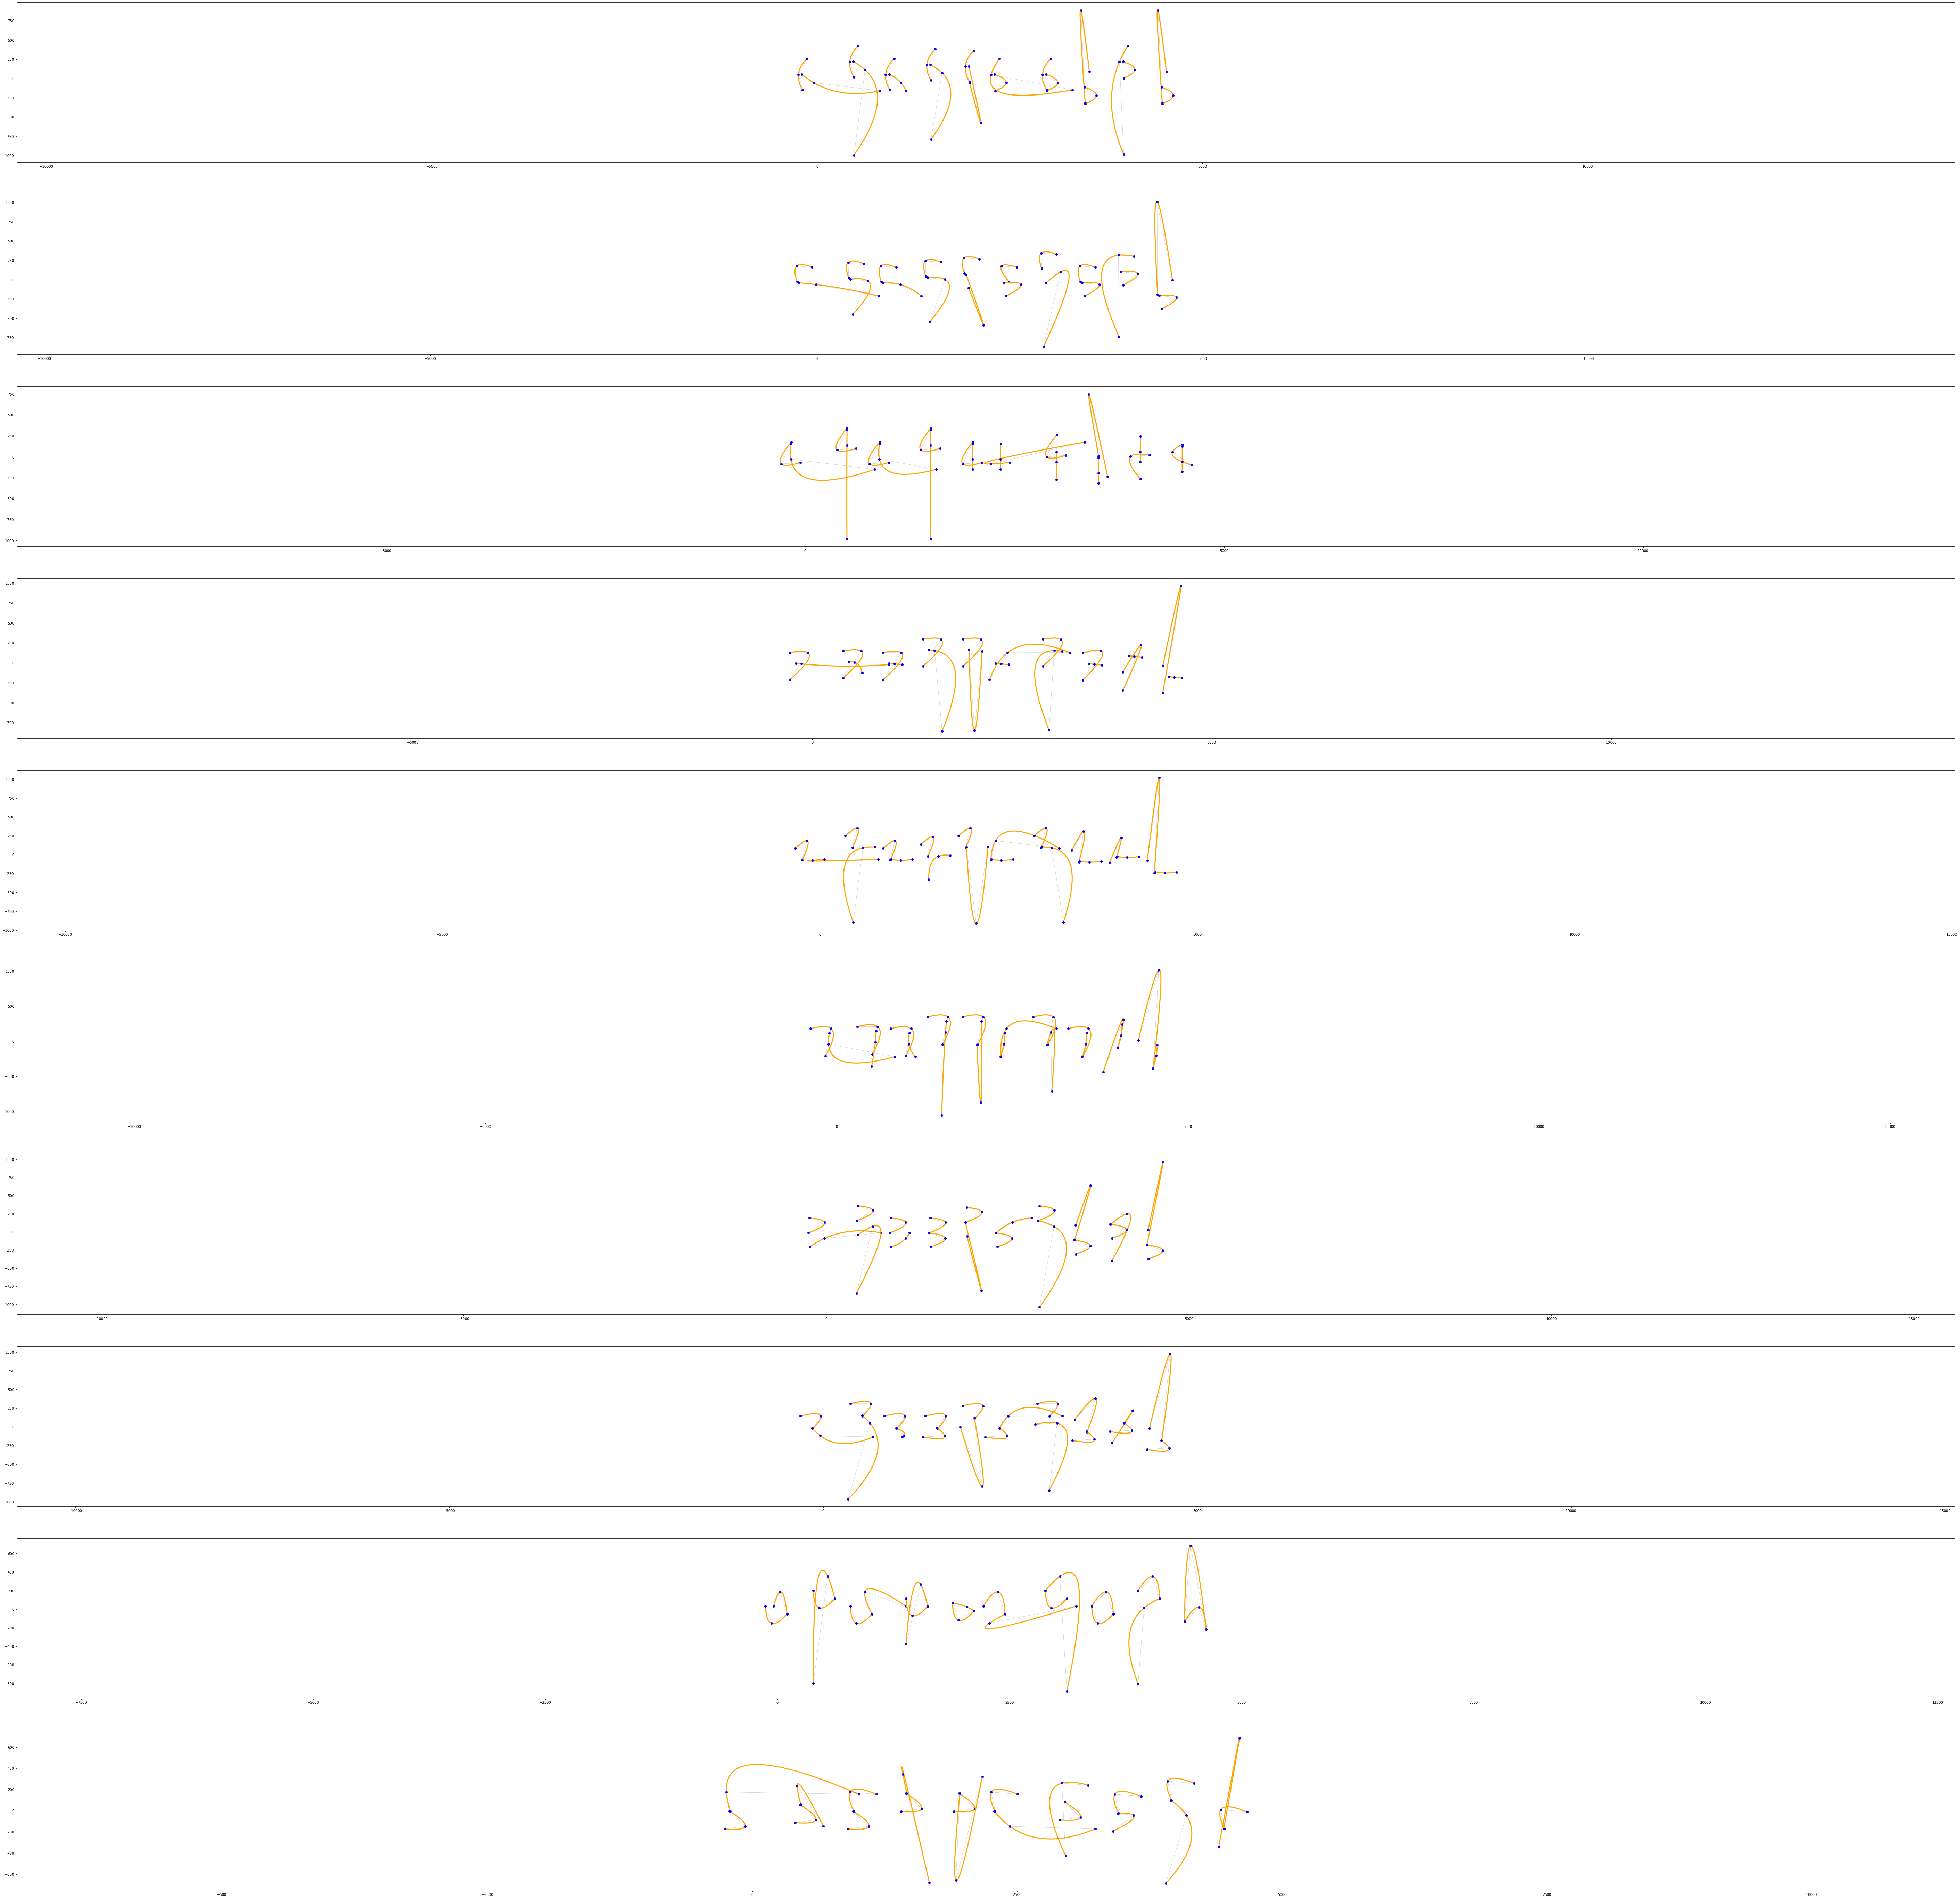

In [41]:
#画10个刚好被误认为其他类的样本的图
plt.figure(figsize=[100,100])
#fig,axes=plt.subplots(10,1)
for n in range(10):
    ax = plt.subplot(10,1,n+1)
    ax=plt.sca(ax)
    barray=np.zeros((10,12))
    x=0
    y=0
    #387 loops
    for i in range(10):
        barray[i]=boundary_svm(train[n],i,1000)
    for j in range(10):
        pairs=barray[j].copy()
        pairs=np.reshape(pairs,(6,-1))

        pairs[:,0]=(pairs[:,0]-np.mean(pairs[:,0]))+x
        pairs[:,1]=-(pairs[:,1]-np.mean(pairs[:,1]))+y
        plt.plot(pairs[:3,0],pairs[:3,1],'k-',lw=0.5,alpha=0.3)
        plt.plot(pairs[3:,0],pairs[3:,1],'k-',lw=0.5,alpha=0.3)
        plotcurve(pairs[:3,:])
        plotcurve(pairs[3:,:])
        #plt.text(np.min(pairs[:,0]),np.mean(pairs[:,1]),[j],fontsize=10)
        x+=500
    plt.axis('equal')

In [42]:
#生成随机样本
def random_sample(x,local,amount):
    new_x=x.copy()
    new_x[local]=new_x[local]+amount
    return new_x

8
[8]
8
[8]
8
[8]
8
[8]
8
[8]
4
[4]
8
[8]
8
[8]
8
[8]
8
[8]
8
[8]
8
[8]
8
[8]
8
[8]
8
[8]
8
[8]
8
[8]
8
[8]
8
[8]
8
[8]
8
[8]
8
[8]
8
[8]
8
[8]
8
[8]


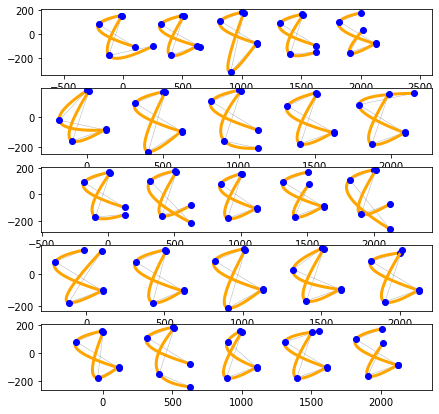

In [118]:
#随机生成的样本，得到电脑的效果
plt.figure(figsize=[7,7])
#fig,axes=plt.subplots(10,1)
for n in range(5):
    ax = plt.subplot(5,1,n+1)
    ax=plt.sca(ax)
    barray=np.zeros((5,12))
    x=0
    y=0
    #387 loops
    for i in range(5):
        random.seed(i*i+3*n*n+i)
        barray[i]=random_sample(train[24],random.randint(0,11),random.uniform(10,200))  
        a=logstic(barray[i])
        b=clf.predict([barray[i]])
        list_a = a.tolist()
        print(list_a.index(max(list_a)))
        print(b)
    for j in range(5):
        pairs=barray[j].copy()
        pairs=np.reshape(pairs,(6,-1))
        pairs[:,0]=(pairs[:,0]-np.mean(pairs[:,0]))+x
        pairs[:,1]=-(pairs[:,1]-np.mean(pairs[:,1]))+y
        plt.plot(pairs[:3,0],pairs[:3,1],'k-',lw=0.5,alpha=0.3)
        plt.plot(pairs[3:,0],pairs[3:,1],'k-',lw=0.5,alpha=0.3)
        plotcurve(pairs[:3,:])
        plotcurve(pairs[3:,:])
        #plt.text(np.min(pairs[:,0]),np.mean(pairs[:,1]),[j],fontsize=10)
        x+=500
    plt.axis('equal')